In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Market_Basket_Optimisation.csv",sep=',') 
# print(data.isnull().sum())
# print("------almonds-------")
# print(data['almonds'].value_counts())
data['almonds'].fillna("mineral water", inplace=True)
# print("-------whole weat flour------")
# print(data['whole weat flour'].value_counts())
data['whole weat flour'].fillna("french fries", inplace=True)
# print("-------avocado------")
# print(data['avocado'].value_counts())
data['avocado'].fillna("mineral water", inplace=True)
# print("-------vegetables mix------")
# print(data['vegetables mix'].value_counts())
data['vegetables mix'].fillna("mineral water", inplace=True)
# print("-----green grapes--------")
# print(data['green grapes'].value_counts())
data['green grapes'].fillna("green tea", inplace=True)
print("-------------")

# print("------yams-------")
# print(data['yams'].value_counts())
data['yams'].fillna("green tea", inplace=True)
# print("-------cottage cheese------")
# print(data['cottage cheese'].value_counts())
data['cottage cheese'].fillna("green tea", inplace=True)
# print("-------energy drink------")
# print(data['energy drink'].value_counts())
data['energy drink'].fillna("green tea", inplace=True)
# print("-------tomato juice------")
# print(data['tomato juice'].value_counts())
data['tomato juice'].fillna("green tea", inplace=True)
# print("-----low fat yogurt--------")
# print(data['low fat yogurt'].value_counts())
data['low fat yogurt'].fillna("green tea", inplace=True)

# print("------green tea-------")
# print(data['green tea'].value_counts())
data['green tea'].fillna("french fries", inplace=True)
# print("------honey-------")
# print(data['honey'].value_counts())
data['honey'].fillna("green tea", inplace=True)
# print("------mineral water-------")
# print(data['mineral water'].value_counts())
data['mineral water'].fillna("magazines", inplace=True)
# print("------salad-------")
# print(data['salad'].value_counts())
data['salad'].fillna("green tea", inplace=True)
# print("------salmon-------")
# print(data['salmon'].value_counts())
data['salmon'].fillna("chocolate", inplace=True)
# print("------antioxydant juice-------")
# print(data['antioxydant juice'].value_counts())
data['antioxydant juice'].fillna("frozen smoothie", inplace=True)
# print("------frozen smoothie-------")
# print(data['frozen smoothie'].value_counts())
data['frozen smoothie'].fillna("mineral water", inplace=True)
# print("------spinach-------")
# print(data['spinach'].value_counts())
data['spinach'].fillna("mayonnaise", inplace=True)
# print("------olive oil-------")
# print(data['olive oil'].value_counts())
data = data.drop(['olive oil'], axis=1)
# # data['olive oil'].fillna("mineral water", inplace=True)

# print("-------------")
print(data.isnull().sum())

data.shape
data.head()

-------------
shrimp               0
almonds              0
avocado              0
vegetables mix       0
green grapes         0
whole weat flour     0
yams                 0
cottage cheese       0
energy drink         0
tomato juice         0
low fat yogurt       0
green tea            0
honey                0
salad                0
mineral water        0
salmon               0
antioxydant juice    0
frozen smoothie      0
spinach              0
dtype: int64


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,green tea,french fries,green tea,green tea,magazines,chocolate,frozen smoothie,mineral water,mayonnaise
1,chutney,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,green tea,french fries,green tea,green tea,magazines,chocolate,frozen smoothie,mineral water,mayonnaise
2,turkey,avocado,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,green tea,french fries,green tea,green tea,magazines,chocolate,frozen smoothie,mineral water,mayonnaise
3,mineral water,milk,energy bar,whole wheat rice,green tea,french fries,green tea,green tea,green tea,green tea,green tea,french fries,green tea,green tea,magazines,chocolate,frozen smoothie,mineral water,mayonnaise
4,low fat yogurt,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,green tea,french fries,green tea,green tea,magazines,chocolate,frozen smoothie,mineral water,mayonnaise


In [24]:
# 1. Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0, data.shape[0]):
    for j in range(0, data.shape[1]):
        transaction.append(data.values[i,j])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 
df["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

# 3. Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

# 5. Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Blues')

,items,incident_count
0,green tea,54680
1,mineral water,18306
2,french fries,14266
3,chocolate,8723
4,frozen smoothie,7971
5,magazines,7558
6,mayonnaise,7544
7,eggs,1348
8,spaghetti,1306
9,milk,972


In [25]:
df_table["all"] = "all" # to have a same origin

fig = px.treemap(df_table.head(30), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['items'],
                  color_continuous_scale='Blues',
                  )
fig.show()

In [26]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
# By Doing So, We Will Be Able To Iterate Through Array of Transactions

transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)

# Create a DataFrame In Order To Check Status of Top20 Items

top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

for i in range(0, len(top20)):
    array = []
    for j in range(0,transaction.shape[0]):
        array.append(np.count_nonzero(transaction[j]==top20[i]))
        if len(array) == len(data):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue
            

df_top20_multiple_record_check.head(10)

,green tea,mineral water,french fries,chocolate,frozen smoothie,magazines,mayonnaise,eggs,spaghetti,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes
0,8,2,2,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1,8,4,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,3,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8,2,2,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,4,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,8,3,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,8,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,9,2,2,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
8,8,4,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,8,3,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
df_top20_multiple_record_check.describe()

,green tea,mineral water,french fries,chocolate,frozen smoothie,magazines,mayonnaise,eggs,spaghetti,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000,7500.000000,7500.000000,7500.000000
mean,7.290667,2.440800,1.902133,1.163067,1.062800,1.007733,1.005867,0.179733,0.174133,0.129600,0.098267,0.095333,0.095067,0.087200,0.081067,0.08040,0.079333,0.076400,0.071333,0.068400
std,1.562596,1.163676,0.566214,0.371251,0.243168,0.114055,0.078101,0.383991,0.379249,0.335885,0.297695,0.293694,0.293327,0.282147,0.272956,0.27193,0.270276,0.265655,0.257398,0.252448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,9.000000,5.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Similar Pattern to Above, Only Change is the Column Number "0" in Append Function
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,0])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1

# 3. Delete NaN Items from Dataset
indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["food"] = "Food"
df_table_first = df_table_first.truncate(before=-1, after=15) # Fist 15 Choice

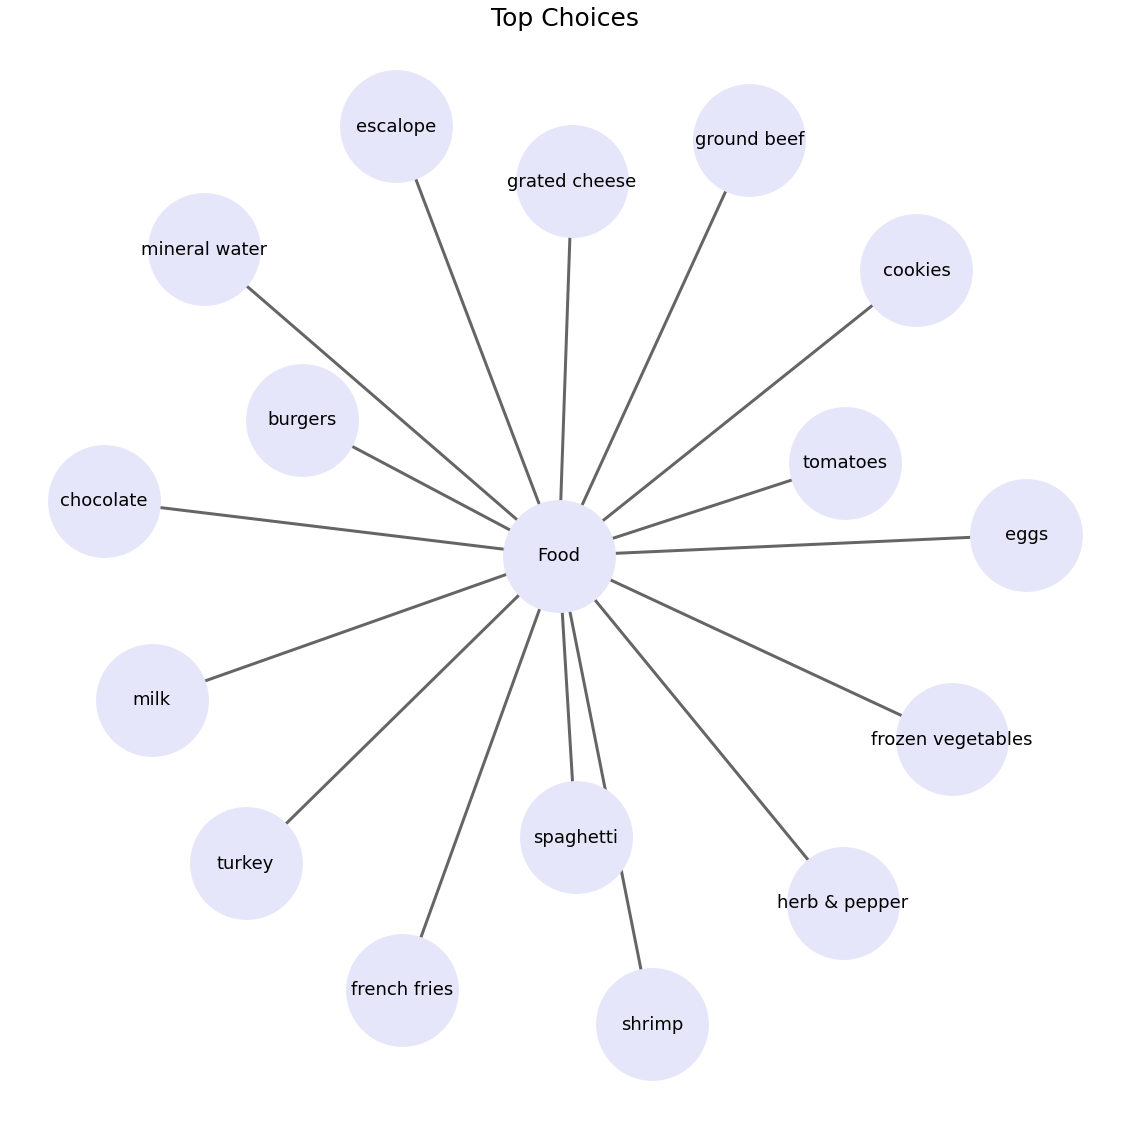

In [31]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'food', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top Choices', fontsize = 25)
plt.show()

In [33]:
transaction = []
for i in range(data.shape[0]):
    transaction.append([str(data.values[i,j]) for j in range(data.shape[1])])
    
transaction = np.array(transaction)
transaction

te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
first50 = df_table["items"].head(50).values # Select Top50
dataset = dataset.loc[:,first50] # Extract Top50
dataset

,green tea,mineral water,french fries,chocolate,frozen smoothie,magazines,mayonnaise,eggs,spaghetti,milk,...,yogurt cake,light mayo,ham,energy bar,energy drink,pepper,cereals,vegetables mix,muffins,oil
0,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,True,True,True,True,True,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7496,True,True,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1
    
dataset = dataset.applymap(encode_units)
dataset.head(10)

,green tea,mineral water,french fries,chocolate,frozen smoothie,magazines,mayonnaise,eggs,spaghetti,milk,...,yogurt cake,light mayo,ham,energy bar,energy drink,pepper,cereals,vegetables mix,muffins,oil
0,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
 #Extracting the most frequest itemsets via Mlxtend.
# The length column has been added to increase ease of filtering.

frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.995867,(green tea),1
1,0.999867,(mineral water),1
2,0.987067,(french fries),1
3,0.999467,(chocolate),1
4,0.999867,(frozen smoothie),1
...,...,...,...
14290,0.014400,"(mayonnaise, mineral water, french fries, froz...",9
14291,0.013467,"(mayonnaise, mineral water, french fries, toma...",9
14292,0.010667,"(cake, mayonnaise, mineral water, french fries...",9
14293,0.010000,"(cake, mayonnaise, mineral water, french fries...",9


In [37]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
50,0.995867,"(mineral water, green tea)",2
51,0.985200,"(green tea, french fries)",2
52,0.995733,"(chocolate, green tea)",2
53,0.995867,"(frozen smoothie, green tea)",2
54,0.995333,"(green tea, magazines)",2
...,...,...,...
344,0.060000,"(chicken, mayonnaise)",2
345,0.058533,"(whole wheat rice, mayonnaise)",2
346,0.052400,"(grated cheese, mayonnaise)",2
347,0.051067,"(mayonnaise, cooking oil)",2


In [38]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
42213,"(herb & pepper, frozen smoothie, mayonnaise)","(chocolate, ground beef)",0.049467,0.098000,0.016000,0.323450,3.300512,0.011152,1.333235,3,2
32154,"(herb & pepper, mayonnaise)","(chocolate, mineral water, ground beef)",0.049467,0.098000,0.016000,0.323450,3.300512,0.011152,1.333235,2,3
10340,"(herb & pepper, mayonnaise)","(chocolate, ground beef)",0.049467,0.098000,0.016000,0.323450,3.300512,0.011152,1.333235,2,2
94117,"(herb & pepper, frozen smoothie)","(chocolate, mineral water, mayonnaise, ground ...",0.049467,0.098000,0.016000,0.323450,3.300512,0.011152,1.333235,2,4
32148,"(herb & pepper, mineral water, mayonnaise)","(chocolate, ground beef)",0.049467,0.098000,0.016000,0.323450,3.300512,0.011152,1.333235,3,2
...,...,...,...,...,...,...,...,...,...,...,...
190531,"(chocolate, french fries, pancakes, green tea)","(frozen smoothie, milk, mayonnaise, mineral wa...",0.089200,0.129467,0.013867,0.155456,1.200741,0.002318,1.030773,4,4
234962,"(french fries, pancakes, magazines, chocolate,...","(frozen smoothie, milk, mayonnaise, mineral wa...",0.089200,0.129467,0.013867,0.155456,1.200741,0.002318,1.030773,5,4
125491,"(french fries, pancakes, magazines, green tea)","(milk, mayonnaise, mineral water)",0.089200,0.129467,0.013867,0.155456,1.200741,0.002318,1.030773,4,3
118996,"(milk, mineral water)","(french fries, pancakes, magazines, frozen smo...",0.129467,0.089200,0.013867,0.107106,1.200741,0.002318,1.020054,2,5


In [39]:
# Sort values based on confidence

rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
11060,"(ground beef, mayonnaise)","(frozen smoothie, spaghetti)",0.098267,0.174000,0.0392,0.398915,2.292612,0.022102,1.374181,2,2
33590,"(frozen smoothie, ground beef, mayonnaise)","(mineral water, spaghetti)",0.098267,0.174000,0.0392,0.398915,2.292612,0.022102,1.374181,3,2
425,(ground beef),"(mineral water, spaghetti)",0.098267,0.174000,0.0392,0.398915,2.292612,0.022102,1.374181,1,2
423,"(mineral water, ground beef)",(spaghetti),0.098267,0.174133,0.0392,0.398915,2.290857,0.022088,1.373959,2,1
11062,(ground beef),"(frozen smoothie, spaghetti, mayonnaise)",0.098267,0.174000,0.0392,0.398915,2.292612,0.022102,1.374181,1,3
...,...,...,...,...,...,...,...,...,...,...,...
79558,"(spaghetti, mayonnaise)","(frozen smoothie, red wine, green tea, magazines)",0.174133,0.027733,0.0100,0.057427,2.070694,0.005171,1.031503,2,4
61856,"(spaghetti, mayonnaise)","(red wine, green tea, magazines, mineral water)",0.174133,0.027733,0.0100,0.057427,2.070694,0.005171,1.031503,2,4
77579,(spaghetti),"(red wine, mayonnaise, magazines, chocolate, g...",0.174133,0.027733,0.0100,0.057427,2.070694,0.005171,1.031503,1,5
23473,(spaghetti),"(frozen smoothie, red wine, green tea, magazines)",0.174133,0.027733,0.0100,0.057427,2.070694,0.005171,1.031503,1,4


In [41]:
rules[~rules["consequents"].str.contains("spaghetti", regex=False) & 
      ~rules["antecedents"].str.contains("green tea", regex=False)].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
8929,"(chocolate, frozen smoothie, burgers)",(eggs),0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,3,1
92609,"(chocolate, frozen smoothie, burgers)","(eggs, mineral water, mayonnaise)",0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,3,3
29331,"(chocolate, frozen smoothie, mineral water, bu...",(eggs),0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,4,1
41465,"(chocolate, frozen smoothie, burgers)","(eggs, mayonnaise)",0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,3,2
29337,"(chocolate, frozen smoothie, burgers)","(mineral water, eggs)",0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,3,2
92595,"(chocolate, frozen smoothie, mayonnaise, burgers)","(mineral water, eggs)",0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,4,2
41459,"(chocolate, frozen smoothie, mayonnaise, burgers)",(eggs),0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,4,1
92589,"(mayonnaise, mineral water, burgers, chocolate...",(eggs),0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,5,1
92597,"(chocolate, frozen smoothie, mineral water, bu...","(eggs, mayonnaise)",0.086933,0.179733,0.0288,0.331288,1.843221,0.013175,1.226637,4,2
92607,"(frozen smoothie, mineral water, burgers)","(chocolate, eggs, mayonnaise)",0.087067,0.179600,0.0288,0.330781,1.841765,0.013163,1.225907,3,3


In [42]:
rules[rules["antecedents"].str.contains("chocolate", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
92864,"(chocolate, frozen smoothie, ground beef)","(mineral water, mayonnaise, spaghetti)",0.098,0.174000,0.038933,0.397279,2.283212,0.021881,1.370451,3,3
31528,"(chocolate, mineral water, ground beef)","(spaghetti, mayonnaise)",0.098,0.174133,0.038933,0.397279,2.281464,0.021868,1.370230,3,2
92860,"(chocolate, mineral water, ground beef)","(frozen smoothie, spaghetti, mayonnaise)",0.098,0.174000,0.038933,0.397279,2.283212,0.021881,1.370451,3,3
92844,"(mayonnaise, mineral water, ground beef, choco...",(spaghetti),0.098,0.174133,0.038933,0.397279,2.281464,0.021868,1.370230,5,1
5273,"(chocolate, mineral water, ground beef)",(spaghetti),0.098,0.174133,0.038933,0.397279,2.281464,0.021868,1.370230,3,1
10024,"(chocolate, ground beef, mayonnaise)",(spaghetti),0.098,0.174133,0.038933,0.397279,2.281464,0.021868,1.370230,3,1
41588,"(chocolate, ground beef, mayonnaise)","(frozen smoothie, spaghetti)",0.098,0.174000,0.038933,0.397279,2.283212,0.021881,1.370451,3,2
41592,"(chocolate, frozen smoothie, ground beef)","(spaghetti, mayonnaise)",0.098,0.174133,0.038933,0.397279,2.281464,0.021868,1.370230,3,2
31526,"(chocolate, ground beef, mayonnaise)","(mineral water, spaghetti)",0.098,0.174000,0.038933,0.397279,2.283212,0.021881,1.370451,3,2
8992,"(chocolate, frozen smoothie, ground beef)",(spaghetti),0.098,0.174133,0.038933,0.397279,2.281464,0.021868,1.370230,3,1
